In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE

print("Libraries loaded successfully")

Libraries loaded successfully


In [2]:
# Load the student data prepared in the previous notebook, into a pandas dataframe
studentEncodedDf = pd.read_csv('../Data/cleaned_dataABCDF.csv')
studentEncodedDf.head()
studentEncodedDf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12392 entries, 0 to 12391
Data columns (total 94 columns):
 #   Column                                                                                 Non-Null Count  Dtype 
---  ------                                                                                 --------------  ----- 
 0   GRADE                                                                                  12392 non-null  object
 1   STRATUM_Stratum 1                                                                      12392 non-null  bool  
 2   STRATUM_Stratum 2                                                                      12392 non-null  bool  
 3   STRATUM_Stratum 3                                                                      12392 non-null  bool  
 4   STRATUM_Stratum 4                                                                      12392 non-null  bool  
 5   STRATUM_Stratum 5                                                                

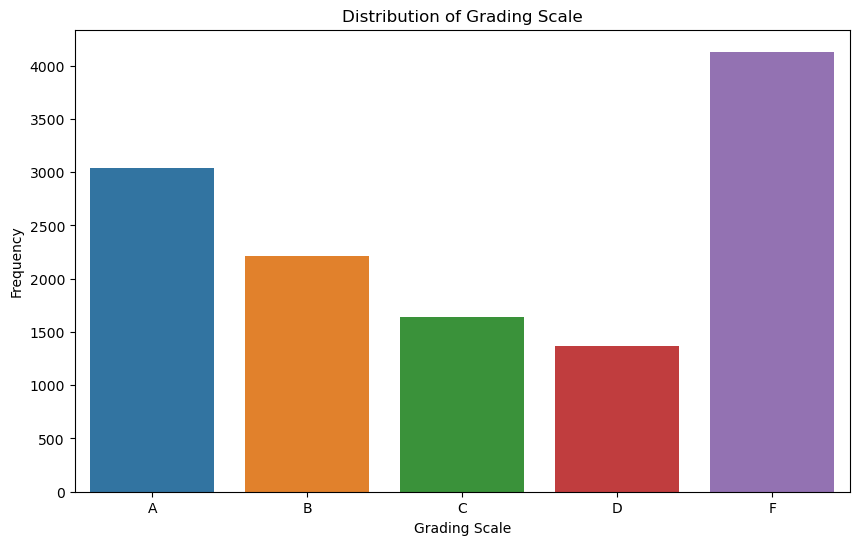

In [3]:
# Plot the distribution of the target variable (GRADE) having the x variables in the following order:
# A+, A, A-, B+, B, B-, C+, C, C-, D+, D, D-, F
# The plot should have the following properties:
# - Title: Distribution of Grading Scale
# - X-axis label: Grading Scale
# - Y-axis label: Frequency
# - X-axis tick labels: A, B, C, D, F

# Define the order of the x variables
order = ['A', 'B', 'C', 'D', 'F']

# Create a countplot with the specified order
plt.figure(figsize=(10,6))
sns.countplot(x='GRADE', data=studentEncodedDf, order=order)

# Set the title and labels
plt.title('Distribution of Grading Scale')
plt.xlabel('Grading Scale')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [4]:
# Find out how much data is available per drading_scale and print it out:
A_df= studentEncodedDf[(studentEncodedDf.GRADE == "A")]
B_df= studentEncodedDf[(studentEncodedDf.GRADE == "B")]
C_df= studentEncodedDf[(studentEncodedDf.GRADE == "C")]
D_df= studentEncodedDf[(studentEncodedDf.GRADE == "D")]
F_df= studentEncodedDf[(studentEncodedDf.GRADE == "F")]

print(f'A df: {A_df.shape}')
print(f'B df: {B_df.shape}')
print(f'C df: {C_df.shape}')
print(f'D df: {D_df.shape}')
print(f'F df: {F_df.shape}')


A df: (3044, 94)
B df: (2211, 94)
C df: (1638, 94)
D df: (1368, 94)
F df: (4131, 94)


In [5]:
def create_factor_df(df):
    factor_df = df.T.drop(['GRADE']).sum(axis=1).to_frame('value')
    factor_df = factor_df[(factor_df.T != 0).any()]
    factor_df = factor_df.sort_values(by='value', ascending=False,
    inplace=False)
    return factor_df

Text(0.5, 1.0, 'A top most influential factors')

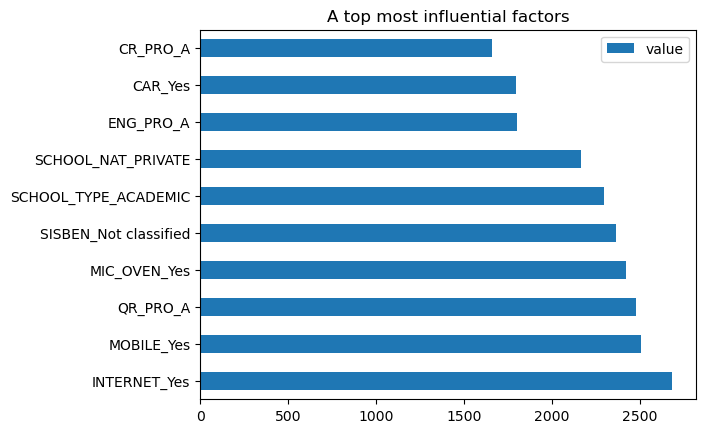

In [6]:
# Plot 10 top most influential factors for A
A_factor_df = create_factor_df(A_df)
A_factor_df.head(10).plot.barh()
plt.title("A top most influential factors")

Text(0.5, 1.0, 'B top most influential factors')

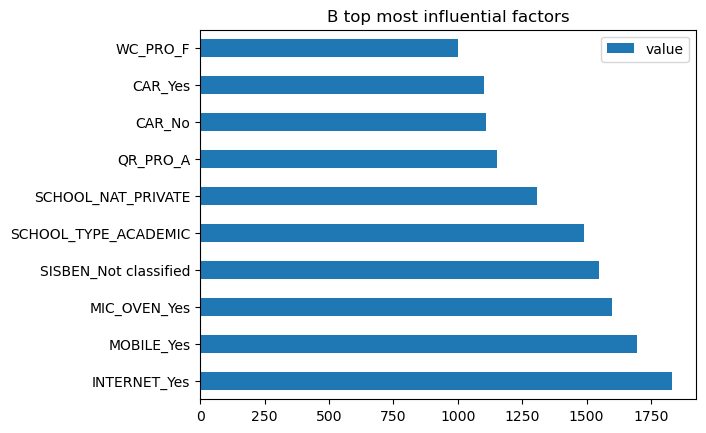

In [7]:
# Plot 10 top most influential factors for B
B_factor_df = create_factor_df(B_df)
B_factor_df.head(10).plot.barh()
plt.title("B top most influential factors")

Text(0.5, 1.0, 'C top most influential factors')

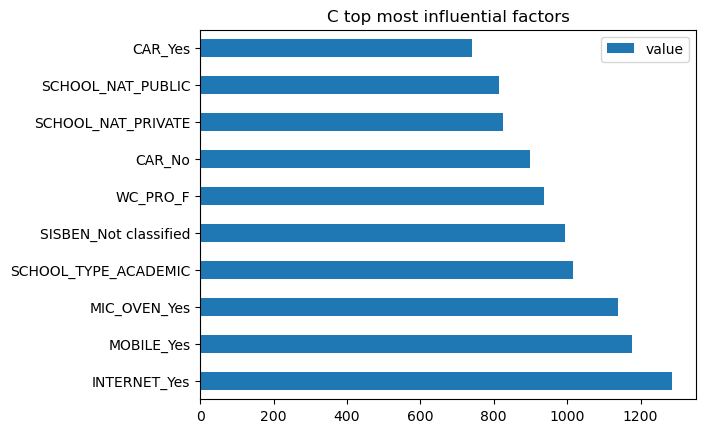

In [8]:
# Plot 10 top most influential factors for C
C_factor_df = create_factor_df(C_df)
C_factor_df.head(10).plot.barh()
plt.title("C top most influential factors")

Text(0.5, 1.0, 'D - top most influential factors')

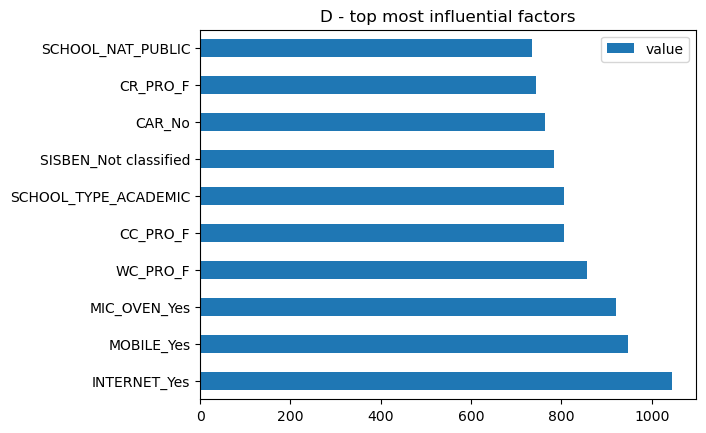

In [9]:
# Plot 10 top most influential factors for D
D_factor_df = create_factor_df(D_df)
D_factor_df.head(10).plot.barh()
plt.title("D - top most influential factors")

Text(0.5, 1.0, 'F - top most influential factors')

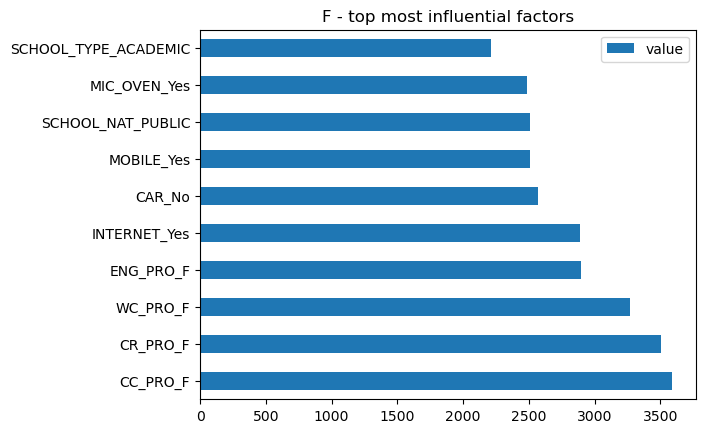

In [10]:
# Plot 10 top most influential factors for F
F_factor_df = create_factor_df(F_df)
F_factor_df.head(10).plot.barh()
plt.title("F - top most influential factors")

In [11]:
# Print the column list of the dataframe, each column per line
for column in A_df.columns:
    print(column)

GRADE
STRATUM_Stratum 1
STRATUM_Stratum 2
STRATUM_Stratum 3
STRATUM_Stratum 4
STRATUM_Stratum 5
STRATUM_Stratum 6
SISBEN_Level 1
SISBEN_Level 2
SISBEN_Level 3
SISBEN_Not classified
INTERNET_No
INTERNET_Yes
MIC_OVEN_No
MIC_OVEN_Yes
CAR_No
CAR_Yes
MOBILE_No
MOBILE_Yes
SCHOOL_TYPE_ACADEMIC
SCHOOL_TYPE_TECHNICAL
SCHOOL_TYPE_TECHNICAL/ACADEMIC
UNIVERSITY_CORPORACION UNIVERSIDAD DE LA COSTA, CUC-BARRANQUILLA
UNIVERSITY_CORPORACION UNIVERSITARIA DE INVESTIGACION Y DESARROLLO -"UDI"-BUCARAMANGA
UNIVERSITY_CORPORACION UNIVERSITARIA DEL HUILA-CORHUILA-NEIVA
UNIVERSITY_CORPORACION UNIVERSITARIA MINUTO DE DIOS -UNIMINUTO-BOGOTÁ D.C.
UNIVERSITY_ESCUELA COLOMBIANA DE INGENIERIA"JULIO GARAVITO"-BOGOTÁ D.C.
UNIVERSITY_FUNDACION UNIVERSIDAD DE AMERICA-BOGOTÁ D.C.
UNIVERSITY_FUNDACION UNIVERSIDAD DE BOGOTA"JORGE TADEO LOZANO"-BOGOTÁ D.C.
UNIVERSITY_FUNDACION UNIVERSITARIA LOS LIBERTADORES-BOGOTÁ D.C.
UNIVERSITY_FUNDACION UNIVERSITARIA TECNOLOGICO COMFENALCO - CARTAGENA      -CARTAGENA
UNIVERSITY_Other
U

The following columns are present in top 10 for all (or almost all) grading values:
- INTERNET_Yes
- MOBILE_Yes
- MIC_OVEN_Yes
- SISBEN_Not classified
- SCHOOL_TYPE_ACADEMIC
- CAR_NO
- WC_PRO_F

We will drop the most common factors that create confusion between distinct grades, by calling drop();
Then we will separate the labels and features

In [12]:
# For features, drop the 9 columns that are not relevant for the analysis and the target variable "GRADE"
featureStudents = studentEncodedDf.drop(['GRADE','INTERNET_Yes','MOBILE_Yes','MIC_OVEN_Yes','SISBEN_Not classified', 
                           'SCHOOL_TYPE_ACADEMIC', 'CAR_No','WC_PRO_F',], axis=1)
labelsGrades = studentEncodedDf.GRADE #.unique()

featureStudents.info()
labelsGrades.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12392 entries, 0 to 12391
Data columns (total 86 columns):
 #   Column                                                                                 Non-Null Count  Dtype
---  ------                                                                                 --------------  -----
 0   STRATUM_Stratum 1                                                                      12392 non-null  bool 
 1   STRATUM_Stratum 2                                                                      12392 non-null  bool 
 2   STRATUM_Stratum 3                                                                      12392 non-null  bool 
 3   STRATUM_Stratum 4                                                                      12392 non-null  bool 
 4   STRATUM_Stratum 5                                                                      12392 non-null  bool 
 5   STRATUM_Stratum 6                                                                      1

In [13]:
# Convert boolean arrays to integer arrays in order to apply successfully the SMOTE algorithm
featureStudents = featureStudents.astype(int)
featureStudents.head()

,STRATUM_Stratum 1,STRATUM_Stratum 2,STRATUM_Stratum 3,STRATUM_Stratum 4,STRATUM_Stratum 5,STRATUM_Stratum 6,SISBEN_Level 1,SISBEN_Level 2,SISBEN_Level 3,INTERNET_No,...,CC_PRO_A,ENG_PRO_F,ENG_PRO_D,ENG_PRO_C,ENG_PRO_B,ENG_PRO_A,WC_PRO_D,WC_PRO_C,WC_PRO_B,WC_PRO_A
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [14]:
oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(featureStudents, labelsGrades)

print(f'new label count: {transformed_label_df.value_counts()}')
print(f'old label count: {studentEncodedDf.GRADE.value_counts()}')

new label count: GRADE
A    4131
F    4131
D    4131
C    4131
B    4131
Name: count, dtype: int64
old label count: GRADE
F    4131
A    3044
B    2211
C    1638
D    1368
Name: count, dtype: int64


In [15]:
# Save your balanced data, including labels and features, into a new dataframe that can be exported into a file
transformed_df = pd.concat([transformed_label_df,transformed_feature_df],axis=1, join='outer')
transformed_df.head()
transformed_df.info()
transformed_df.to_csv("../Data/data_academic_readyABCDF.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20655 entries, 0 to 20654
Data columns (total 87 columns):
 #   Column                                                                                 Non-Null Count  Dtype 
---  ------                                                                                 --------------  ----- 
 0   GRADE                                                                                  20655 non-null  object
 1   STRATUM_Stratum 1                                                                      20655 non-null  int32 
 2   STRATUM_Stratum 2                                                                      20655 non-null  int32 
 3   STRATUM_Stratum 3                                                                      20655 non-null  int32 
 4   STRATUM_Stratum 4                                                                      20655 non-null  int32 
 5   STRATUM_Stratum 5                                                                